### Подготовка

In [0]:
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split

boston = sklearn.datasets.load_boston()
data = boston["data"]
target = boston["target"]
feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Основная задача

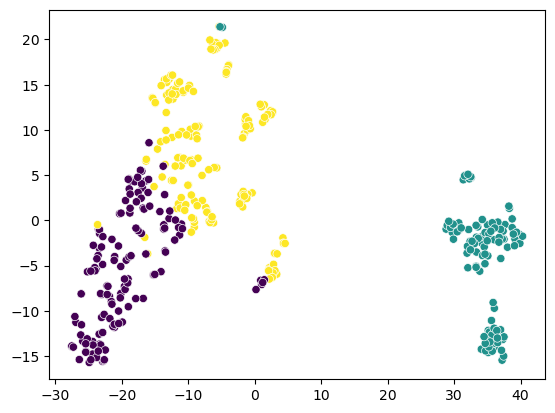

In [0]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

km = KMeans(n_clusters=3, random_state=42, max_iter=100)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_km = km.fit_predict(X_train_scaled)
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], c=x_km)

In [0]:
import numpy as np

arr = np.insert(X_train_scaled, 0, x_km, axis=1)
arr = np.hstack((arr, y_train))
a = ['GROUP']+list(feature_names)+['price']
X_train_scaled = pd.DataFrame(arr, columns=a)

In [0]:
c_0 = X_train_scaled[X_train_scaled['GROUP'] == 0].mean()
c_1 = X_train_scaled[X_train_scaled['GROUP'] == 1].mean()
c_2 = X_train_scaled[X_train_scaled['GROUP'] == 2].mean()
print(c_0["CRIM"], c_1["CRIM"], c_2["CRIM"])
print(c_0["price"], c_1["price"], c_2["price"])

0.0009830922720615552 0.14520329357078152 0.007833418889266303
26.836879432624105 16.187378640776704 23.490624999999994


## Задание 3

In [0]:
X_test_scaled = scaler.transform(X_test)
x_test_km = km.predict(X_test_scaled)
arr = np.insert(X_test_scaled, 0, x_test_km, axis=1)
arr = np.hstack((arr, y_test))
a = ['GROUP']+list(feature_names)+['price']
X_test_scaled = pd.DataFrame(arr, columns=a)
c_0 = X_test_scaled[X_test_scaled['GROUP'] == 0].mean()
c_1 = X_test_scaled[X_test_scaled['GROUP'] == 1].mean()
c_2 = X_test_scaled[X_test_scaled['GROUP'] == 2].mean()
print(c_0["CRIM"], c_1["CRIM"], c_2["CRIM"])
print(c_0["price"], c_1["price"], c_2["price"])

0.0012883293130359634 0.12025363658101317 0.004461489938869565
26.989743589743586 16.421212121212122 19.91
